In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
C = 299_792_458.0  # speed of light (used as a scale)

def generate_wave_snapshot(n_points, t, noise_level, seed=0):
    rng = np.random.default_rng(seed)
    x = np.linspace(0, 2*np.pi, n_points, endpoint=False)

    # Toy electric field
    E = np.sin(x - 2*t) + 0.3*np.sin(3*x - t)

    # Toy magnetic field (phase-shifted)
    B = 0.7*np.sin(x - 2*t + np.pi/2) + 0.25*np.sin(3*x - t + np.pi/2)

    # Add noise (this is our sweep knob)
    E += noise_level * rng.standard_normal(n_points)
    B += noise_level * rng.standard_normal(n_points)

    return x, E, B

In [4]:
def info_proxy_entropy(signal, bins=64):
    hist, _ = np.histogram(signal, bins=bins, density=False)
    p = hist.astype(float)
    if p.sum() == 0:
        return 0.0
    p /= p.sum()
    p = p[p > 0]
    return float(-np.sum(p * np.log2(p)))

In [5]:
def bound_margin(E, B, I_proxy, eps=1e-12):
    E_rms = np.sqrt(np.mean(E**2)) + eps
    B_rms = np.sqrt(np.mean(B**2)) + eps

    allowed_B = (E_rms / C) * np.sqrt(I_proxy + 1.0)
    return allowed_B / B_rms

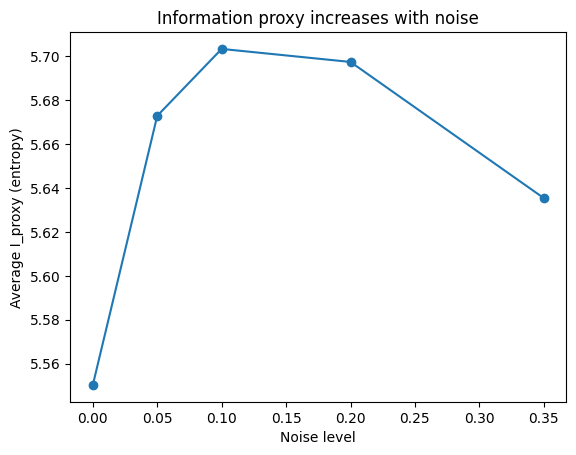

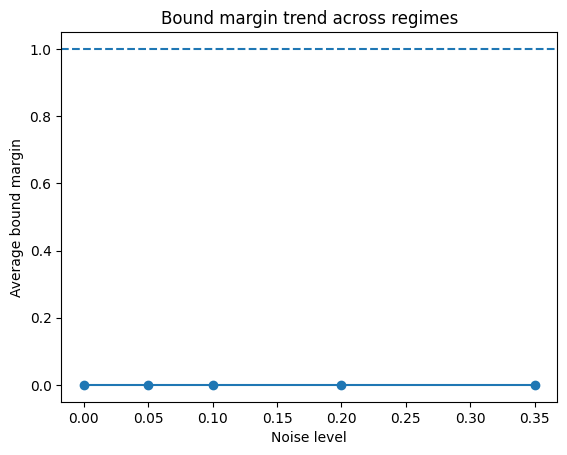

In [6]:
n_points = 512
times = np.linspace(0, 6, 60)
noise_levels = [0.0, 0.05, 0.1, 0.2, 0.35]

avg_I = []
avg_margin = []

for k, noise in enumerate(noise_levels):
    I_vals = []
    m_vals = []
    for t in times:
        _, E, B = generate_wave_snapshot(n_points, t, noise, seed=100+k)
        I = info_proxy_entropy(E)
        m = bound_margin(E, B, I)
        I_vals.append(I)
        m_vals.append(m)
    avg_I.append(np.mean(I_vals))
    avg_margin.append(np.mean(m_vals))

# Plot 1: Information proxy vs noise
plt.figure()
plt.plot(noise_levels, avg_I, marker='o')
plt.xlabel("Noise level")
plt.ylabel("Average I_proxy (entropy)")
plt.title("Information proxy increases with noise")
plt.show()

# Plot 2: Bound margin vs noise
plt.figure()
plt.plot(noise_levels, avg_margin, marker='o')
plt.axhline(1.0, linestyle='--')
plt.xlabel("Noise level")
plt.ylabel("Average bound margin")
plt.title("Bound margin trend across regimes")
plt.show()

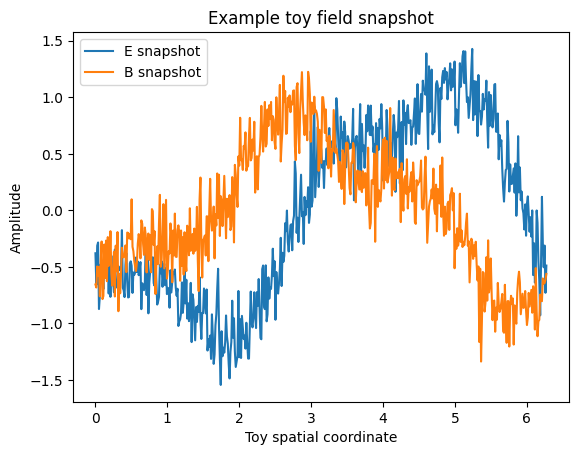

In [7]:
x, E0, B0 = generate_wave_snapshot(512, t=1.5, noise_level=0.2, seed=42)

plt.figure()
plt.plot(x, E0, label="E snapshot")
plt.plot(x, B0, label="B snapshot")
plt.xlabel("Toy spatial coordinate")
plt.ylabel("Amplitude")
plt.title("Example toy field snapshot")
plt.legend()
plt.show()